# EDA - Ukraine Russia War
Dataset: [2022 Ukraine Russia War](https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war)

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load and Standardize Data

In [2]:
russia_losses_equipment = pd.read_csv("/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv")
russia_losses_personnel = pd.read_csv("/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv")

## 🔗Russia Losses Equipment

In [3]:
russia_losses_equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       815 non-null    object 
 1   day                        815 non-null    int64  
 2   aircraft                   815 non-null    int64  
 3   helicopter                 815 non-null    int64  
 4   tank                       815 non-null    int64  
 5   APC                        815 non-null    int64  
 6   field artillery            815 non-null    int64  
 7   MRL                        815 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      815 non-null    int64  
 11  naval ship                 815 non-null    int64  
 12  anti-aircraft warfare      815 non-null    int64  
 13  special equipment          796 non-null    float64

In [4]:
russia_losses_equipment.isnull().sum()

date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                750
fuel tank                    750
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           779
greatest losses direction    612
vehicles and fuel tanks       65
cruise missiles               65
submarines                   566
dtype: int64

In [5]:
russia_losses_equipment.fillna(0, inplace=True)

In [6]:
russia_losses_equipment.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,submarines
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,409.000000,279.874847,265.197546,3715.192638,7308.439264,4243.855215,566.364417,83.543558,5.528834,3369.531288,17.596319,352.644172,602.915337,0.174233,6642.903067,959.209816,0.305521
std,235.414528,64.856307,67.724503,1925.093135,3430.255545,3600.234377,300.512614,312.597979,18.910791,2804.950000,5.179836,229.459082,604.189413,0.813929,4297.948901,684.840740,0.460911
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205.500000,250.500000,216.000000,2200.500000,4695.500000,1304.000000,312.000000,0.000000,0.000000,909.500000,15.000000,168.000000,121.000000,0.000000,3560.500000,234.500000,0.000000
50%,409.000000,307.000000,292.000000,3636.000000,7020.000000,2727.000000,533.000000,0.000000,0.000000,2298.000000,18.000000,282.000000,304.000000,0.000000,5599.000000,911.000000,0.000000
75%,612.500000,320.000000,324.000000,5171.000000,9753.500000,7184.000000,834.000000,0.000000,0.000000,5399.000000,20.000000,558.000000,1011.500000,0.000000,9528.000000,1542.500000,1.000000
max,816.000000,354.000000,326.000000,7576.000000,14630.000000,12687.000000,1074.000000,1701.000000,76.000000,10155.000000,26.000000,803.000000,2077.000000,4.000000,17251.000000,2204.000000,1.000000


## 🔗Russia Losses Personnel

In [7]:
russia_losses_personnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        815 non-null    object 
 1   day         815 non-null    int64  
 2   personnel   815 non-null    int64  
 3   personnel*  815 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 32.0+ KB


In [8]:
russia_losses_personnel.isnull().sum()

date            0
day             0
personnel       0
personnel*      0
POW           753
dtype: int64

In [9]:
russia_losses_personnel.describe()

,day,personnel,POW
count,815.000000,815.000000,62.000000
mean,409.000000,192622.092025,386.387097
std,235.414528,142717.033908,131.440363
min,2.000000,2800.000000,0.000000
25%,205.500000,54150.000000,389.000000
50%,409.000000,177680.000000,421.000000
75%,612.500000,298750.000000,474.500000
max,816.000000,492290.000000,496.000000


# 2. Explore Data

## 🔗Russia Losses Equipment

In [10]:
russia_losses_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2024-05-19,816,354,326,7576,14630,12687,1074,0.0,0.0,10155,26,803,2077.0,0.0,0,17251.0,2204.0,1.0
1,2024-05-18,815,354,326,7560,14595,12639,1071,0.0,0.0,10108,26,801,2075.0,0.0,0,17169.0,2203.0,1.0
2,2024-05-17,814,353,326,7547,14552,12603,1071,0.0,0.0,10073,26,800,2069.0,0.0,0,17104.0,2200.0,1.0
3,2024-05-16,813,351,325,7529,14538,12565,1070,0.0,0.0,10028,26,798,2062.0,0.0,0,17048.0,2200.0,1.0
4,2024-05-15,812,351,325,7510,14508,12538,1070,0.0,0.0,10015,26,798,2061.0,0.0,0,16955.0,2199.0,1.0


In [11]:
russia_losses_equipment.tail()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
810,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,0.0,0.0,0,0.0,0.0,0.0
811,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,0.0,0.0,0,0.0,0.0,0.0
812,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,0.0,0.0,0,0.0,0.0,0.0
813,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,0.0,0.0,0,0.0,0.0,0.0
814,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,0.0,0.0,0,0.0,0.0,0.0


**DATE UPDATE**

In [12]:
russia_losses_equipment['date'] = pd.to_datetime(russia_losses_equipment['date'])
last_date = russia_losses_equipment['date'][0].date().strftime("%d %B %Y")
print(f'Latest Update: {last_date}')

Latest Update: 19 May 2024


**LOSSES UPDATE**

In [13]:
cumulative_losses = russia_losses_equipment.iloc[0:1,2:].sort_values(by=0, axis=1, ascending=False).T
cumulative_losses.reset_index(inplace=True)
cumulative_losses.rename(columns={'index': 'type_of_equipment', 0: 'unit_amount'}, inplace=True)

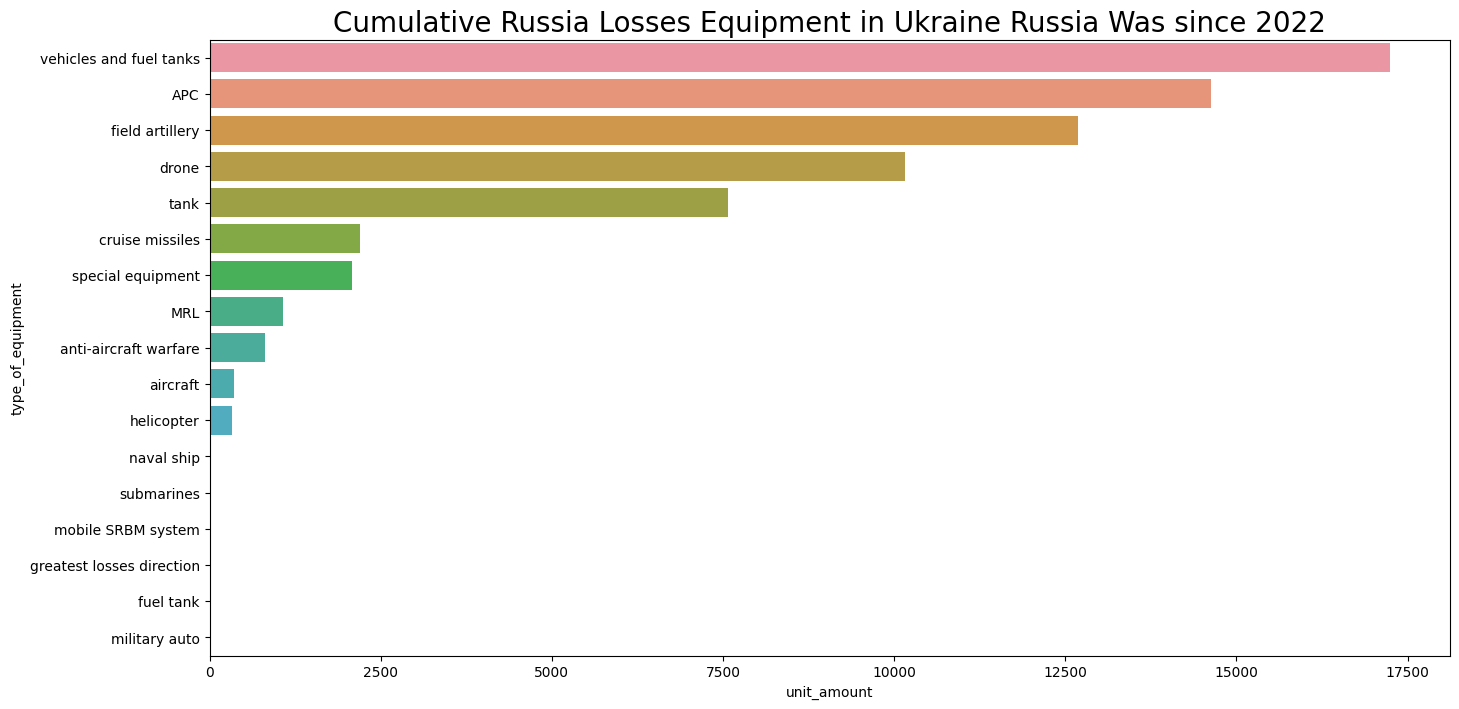

In [14]:
plt.figure(figsize=(16,8))
plt.title('Cumulative Russia Losses Equipment in Ukraine Russia Was since 2022', fontsize=20)
sns.barplot(x='unit_amount', y='type_of_equipment', data=cumulative_losses);

**CATEGORIZE UNITS: AIR, GROUND, NAVAL UNITS**

In [15]:
russia_losses_equipment.columns.values

array(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'greatest losses direction',
       'vehicles and fuel tanks', 'cruise missiles', 'submarines'],
      dtype=object)

In [16]:
air_units = ['aircraft', 'helicopter', 'drone', 'cruise missiles']
ground_units = ['tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank', 'anti-aircraft warfare', 'special equipment',
               'mobile SRBM system', 'greatest losses direction', 'vehicles and fuel tanks']
naval_units = ['naval ship', 'submarines']

russia_losses_equipment['total air units'] = russia_losses_equipment[air_units].sum(axis=1, numeric_only=True)
russia_losses_equipment['total ground units'] = russia_losses_equipment[ground_units].sum(axis=1, numeric_only=True)
russia_losses_equipment['total naval units'] = russia_losses_equipment[naval_units].sum(axis=1, numeric_only=True)
russia_losses_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines,total air units,total ground units,total naval units
0,2024-05-19,816,354,326,7576,14630,12687,1074,0.0,0.0,...,803,2077.0,0.0,0,17251.0,2204.0,1.0,13039.0,56098.0,27.0
1,2024-05-18,815,354,326,7560,14595,12639,1071,0.0,0.0,...,801,2075.0,0.0,0,17169.0,2203.0,1.0,12991.0,55910.0,27.0
2,2024-05-17,814,353,326,7547,14552,12603,1071,0.0,0.0,...,800,2069.0,0.0,0,17104.0,2200.0,1.0,12952.0,55746.0,27.0
3,2024-05-16,813,351,325,7529,14538,12565,1070,0.0,0.0,...,798,2062.0,0.0,0,17048.0,2200.0,1.0,12904.0,55610.0,27.0
4,2024-05-15,812,351,325,7510,14508,12538,1070,0.0,0.0,...,798,2061.0,0.0,0,16955.0,2199.0,1.0,12890.0,55440.0,27.0


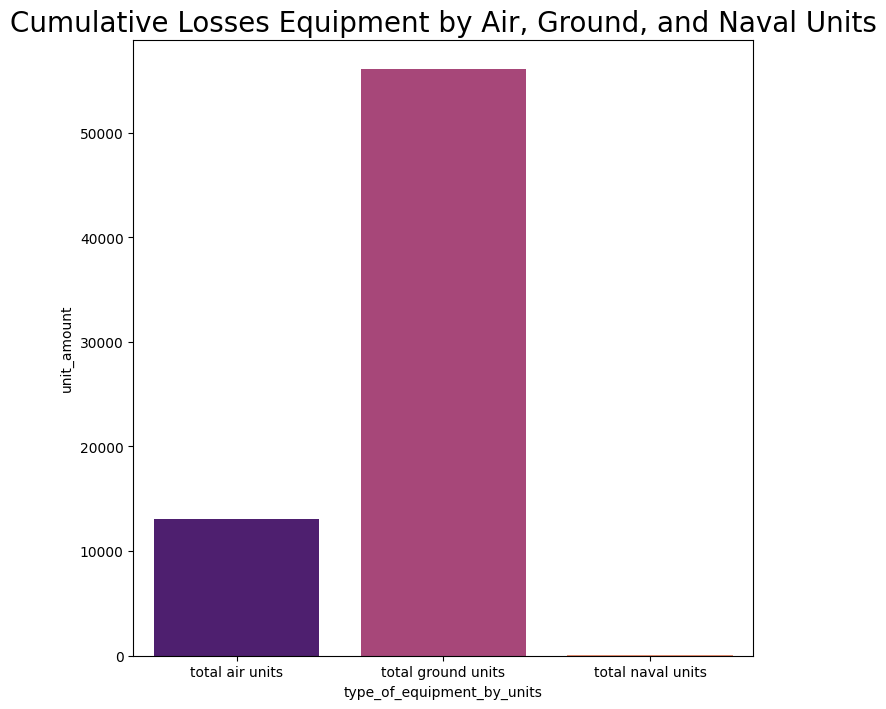

In [17]:
cumulative_losses_by_units = russia_losses_equipment.iloc[0:1,-3:].T
cumulative_losses_by_units.reset_index(inplace=True)
cumulative_losses_by_units.rename(columns={'index': 'type_of_equipment_by_units', 0: 'unit_amount'}, inplace=True)
plt.figure(figsize=(8,8))
plt.title('Cumulative Losses Equipment by Air, Ground, and Naval Units', fontsize=20)
sns.barplot(x='type_of_equipment_by_units', y='unit_amount', data=cumulative_losses_by_units, palette='magma');

In [18]:
def impute_unit(unit_name):
    if unit_name in air_units:
        return 'Air Units'
    elif unit_name in naval_units:
        return 'Naval Units'
    else:
        return 'Ground Units'
    
cumulative_losses['unit_type'] = cumulative_losses['type_of_equipment'].apply(lambda x: impute_unit(x))   
cumulative_losses

,type_of_equipment,unit_amount,unit_type
0,vehicles and fuel tanks,17251.0,Ground Units
1,APC,14630,Ground Units
2,field artillery,12687,Ground Units
3,drone,10155,Air Units
4,tank,7576,Ground Units
5,cruise missiles,2204.0,Air Units
6,special equipment,2077.0,Ground Units
7,MRL,1074,Ground Units
8,anti-aircraft warfare,803,Ground Units
9,aircraft,354,Air Units


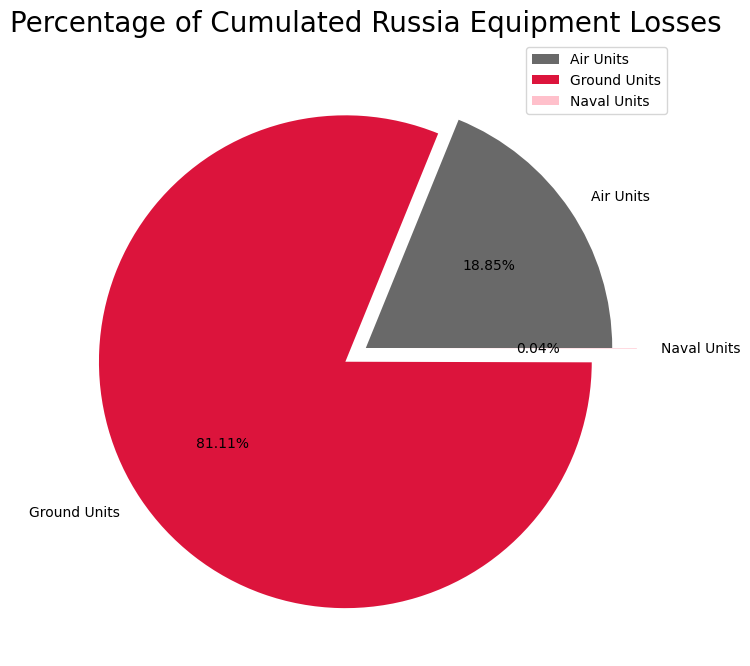

In [19]:
percent = cumulative_losses[['unit_amount', 'unit_type']].groupby('unit_type').sum().squeeze()
plt.figure(figsize=(8,8))
plt.pie(percent.values, labels=percent.index, autopct='%.2f%%', startangle=0, explode=[0, 0.1, 0.1], colors=['dimgrey', 'crimson', 'pink'])
plt.legend()
plt.title('Percentage of Cumulated Russia Equipment Losses', fontsize=20)
plt.show()

## 🔗Russia Losses Personnel

In [20]:
russia_losses_personnel.head()

,date,day,personnel,personnel*,POW
0,2024-05-19,816,492290,about,NaN
1,2024-05-18,815,491080,about,NaN
2,2024-05-17,814,489870,about,NaN
3,2024-05-16,813,488460,about,NaN
4,2024-05-15,812,486940,about,NaN


In [21]:
russia_losses_personnel.tail()

,date,day,personnel,personnel*,POW
810,2022-03-01,6,5710,about,200.0
811,2022-02-28,5,5300,about,0.0
812,2022-02-27,4,4500,about,0.0
813,2022-02-26,3,4300,about,0.0
814,2022-02-25,2,2800,about,0.0


In [22]:
russia_losses_personnel['date'] = pd.to_datetime(russia_losses_personnel['date'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


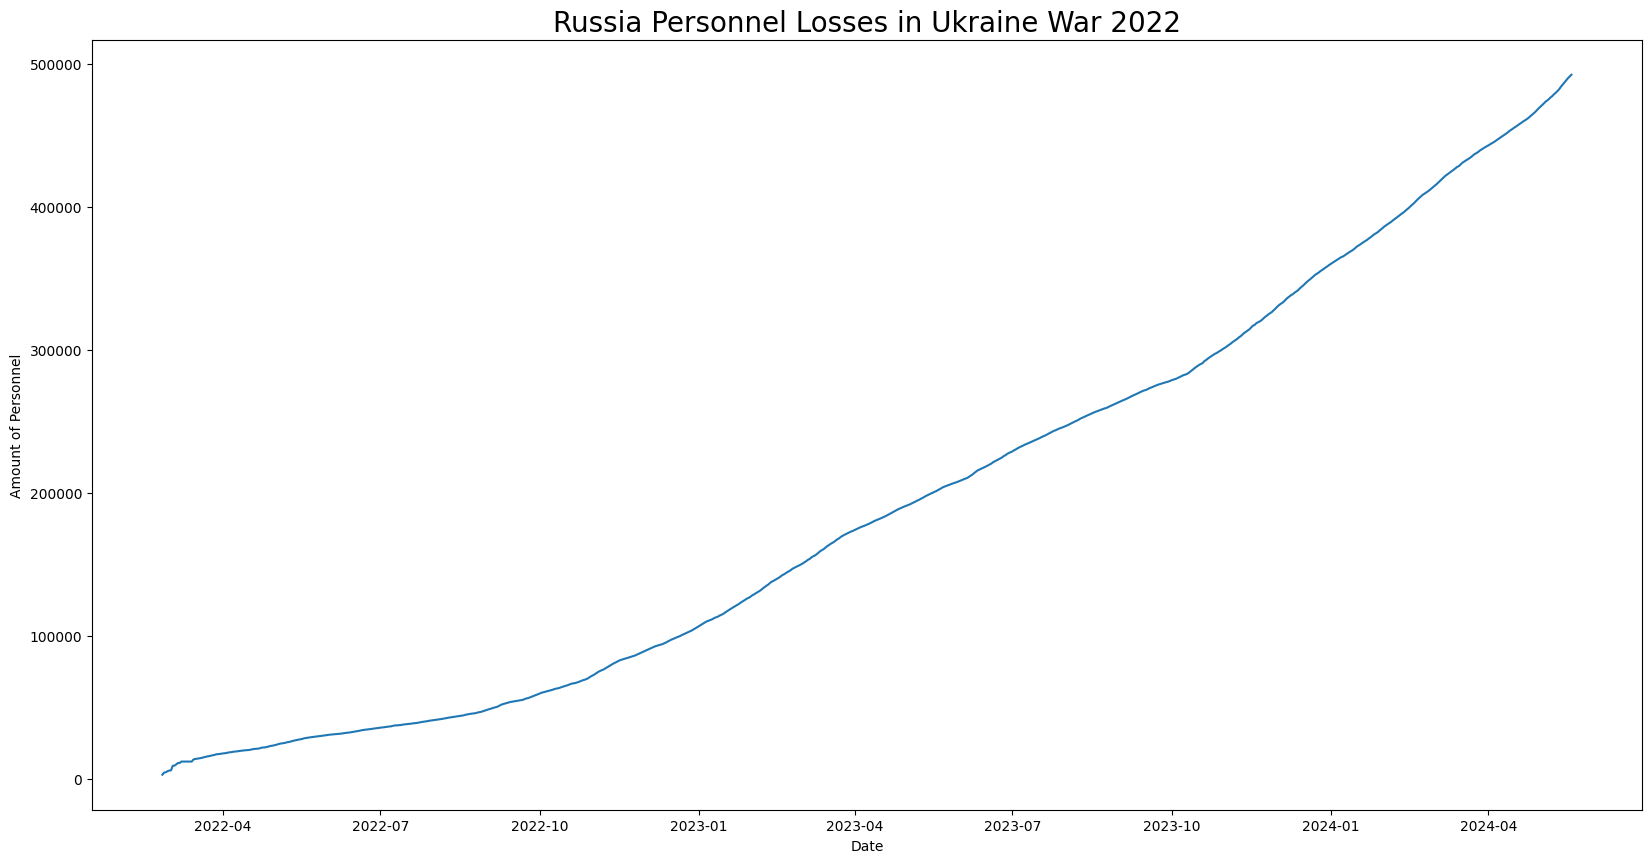

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date', y='personnel', data=russia_losses_personnel);
plt.title('Russia Personnel Losses in Ukraine War 2022', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Amount of Personnel')
plt.show();